<a href="https://colab.research.google.com/github/junseok-jay/AI_lab/blob/main/week3/resample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
pip install boto3

In [93]:
import io, torch, os, tarfile, tempfile

import boto3
import matplotlib.pyplot as plt
import requests
from botocore import UNSIGNED
from botocore.config import Config
from IPython.display import Audio
from torchaudio.utils import download_asset

import torchaudio

SAMPLE_GSM = download_asset("tutorial-assets/steam-train-whistle-daniel_simon.gsm")
SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
SAMPLE_WAV_8000 = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042-8000hz.wav")


def _hide_seek(obj):
    class _wrapper:
        def __init__(self, obj):
            self.obj = obj

        def read(self, n):
            return self.obj.read(n)

    return _wrapper(obj)

/tmp/ipython-input-3656432517.py:13: UserWarning: torchaudio.utils.download.download_asset has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  SAMPLE_GSM = download_asset("tutorial-assets/steam-train-whistle-daniel_simon.gsm")
/tmp/ipython-input-3656432517.py:14: UserWarning: torchaudio.utils.download.download_asset has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
/tmp/ipython-input-3656432517.py:15: UserWarning: torchaudio.utils.download.download_asset has been deprecated. This deprecation is part of a

In [94]:
metadata = torchaudio.info(SAMPLE_WAV)
print(metadata)

AudioMetaData(sample_rate=16000, num_frames=54400, num_channels=1, bits_per_sample=16, encoding=PCM_S)


/tmp/ipython-input-3458049858.py:1: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  metadata = torchaudio.info(SAMPLE_WAV)
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:20: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  s = torcha

In [95]:
# Checking metadata of sample audio
mySampleUrls = [
  "/content/drive/MyDrive/Colab Notebooks/AI_lab/week3/sample_audio/095522039.m4a",
  "/content/drive/MyDrive/Colab Notebooks/AI_lab/week3/sample_audio/095522040.m4a",
  "/content/drive/MyDrive/Colab Notebooks/AI_lab/week3/sample_audio/095522041.m4a",
  "/content/drive/MyDrive/Colab Notebooks/AI_lab/week3/sample_audio/095522042.m4a"
]

for i, path in enumerate(mySampleUrls):
  try:
    metadata = torchaudio.info(path)
    print(f"[{i}] {path}")
    print(metadata)
  except Exception as e:
    print(f"[{i}] {path} -> Error : {e}")

[0] /content/drive/MyDrive/Colab Notebooks/AI_lab/week3/sample_audio/095522039.m4a
AudioMetaData(sample_rate=44100, num_frames=174, num_channels=1, bits_per_sample=0, encoding=AAC)
[1] /content/drive/MyDrive/Colab Notebooks/AI_lab/week3/sample_audio/095522040.m4a
AudioMetaData(sample_rate=44100, num_frames=174, num_channels=1, bits_per_sample=0, encoding=AAC)
[2] /content/drive/MyDrive/Colab Notebooks/AI_lab/week3/sample_audio/095522041.m4a
AudioMetaData(sample_rate=44100, num_frames=174, num_channels=1, bits_per_sample=0, encoding=AAC)
[3] /content/drive/MyDrive/Colab Notebooks/AI_lab/week3/sample_audio/095522042.m4a
AudioMetaData(sample_rate=44100, num_frames=174, num_channels=1, bits_per_sample=0, encoding=AAC)


/tmp/ipython-input-307298819.py:11: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  metadata = torchaudio.info(path)


In [96]:
# waveform, sample_rate = torchaudio.load(mySampleUrls[0])

waveform, sample_rate = [], []
for i, path in  enumerate(mySampleUrls):
  try:
    new_waveform, new_sample_rate = torchaudio.load(path)
    waveform.append(new_waveform), sample_rate.append(new_sample_rate)
  except Exception as e:
    print('path err')


# 리스트에 저장된 텐서 확인
for idx, w in enumerate(waveform):
    print(f"Index {idx}: shape={w.shape}, sample_rate={sample_rate[idx]}")

Index 0: shape=torch.Size([1, 177152]), sample_rate=44100
Index 1: shape=torch.Size([1, 177152]), sample_rate=44100
Index 2: shape=torch.Size([1, 177152]), sample_rate=44100
Index 3: shape=torch.Size([1, 177152]), sample_rate=44100


/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r

In [97]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")

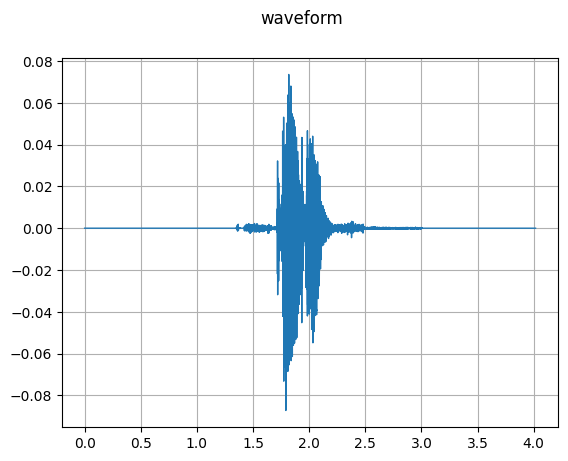

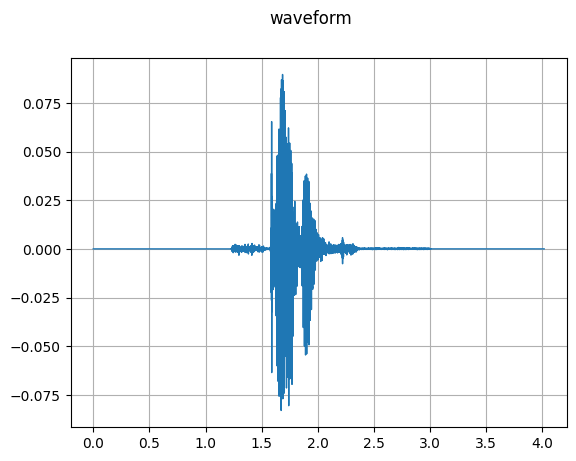

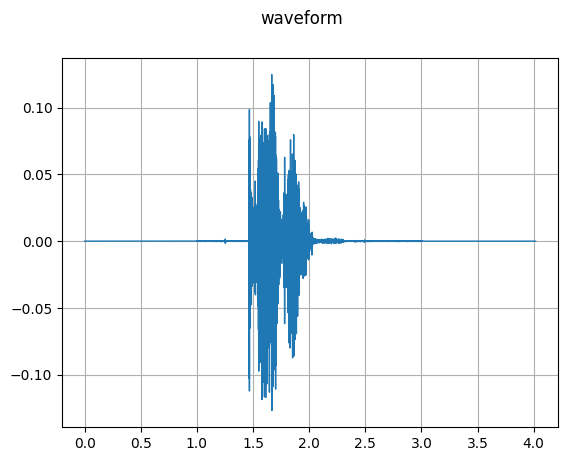

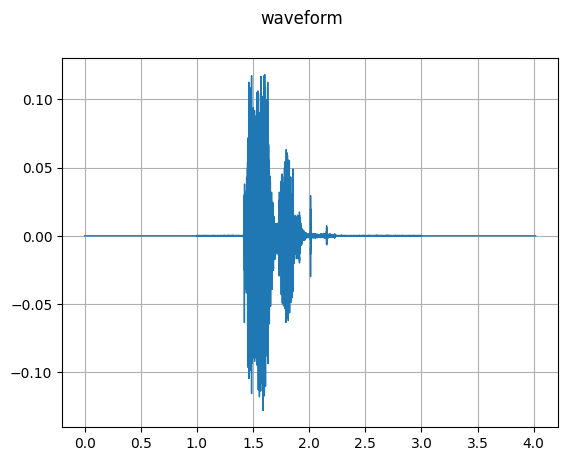

In [98]:
for idx, w in enumerate(waveform):
  plot_waveform(waveform[idx], sample_rate[idx])


In [99]:
def _slice_zero(input: torch.Tensor):
    assert input.dim() == 2
    channel = input[0]

    nonzero = torch.nonzero(channel, as_tuple=True)[0]

    if len(nonzero) == 0:
        return input[:, :0], None, None

    head, tail = nonzero[0].item(), nonzero[-1].item() + 1
    return torch.tensor(input[:, head:tail])

/tmp/ipython-input-3221904775.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(input[:, head:tail])


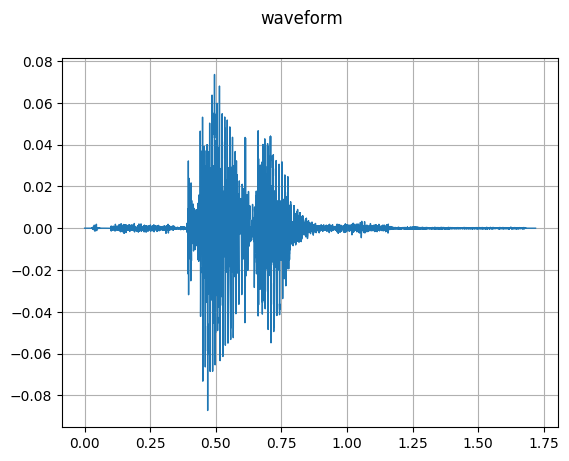

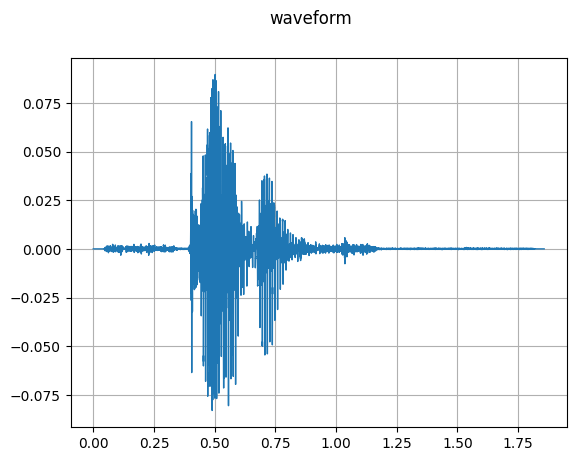

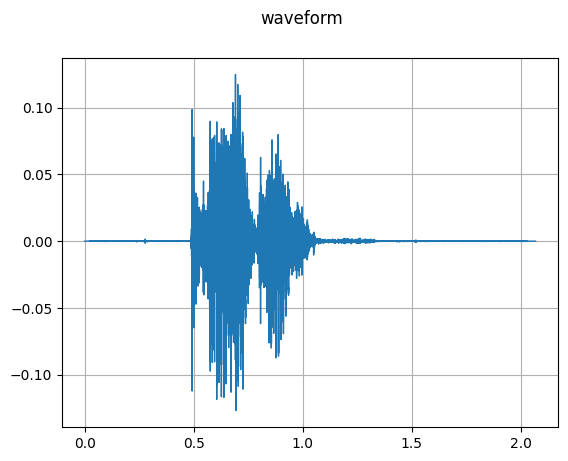

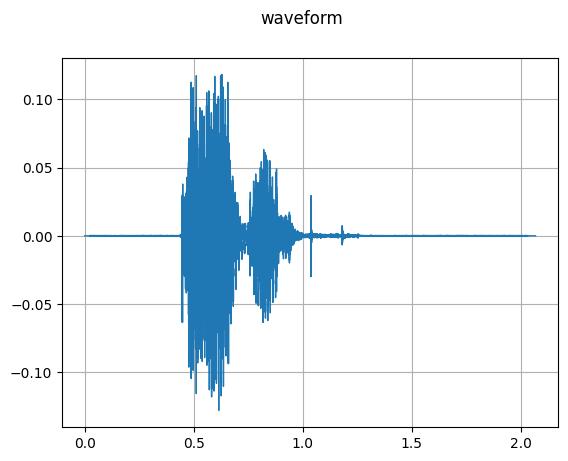

In [100]:
for idx, w in enumerate(waveform):
  waveform[idx] = _slice_zero(waveform[idx])
  plot_waveform(waveform[idx], sample_rate[idx])

In [101]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)

/usr/local/lib/python3.12/dist-packages/matplotlib/axes/_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


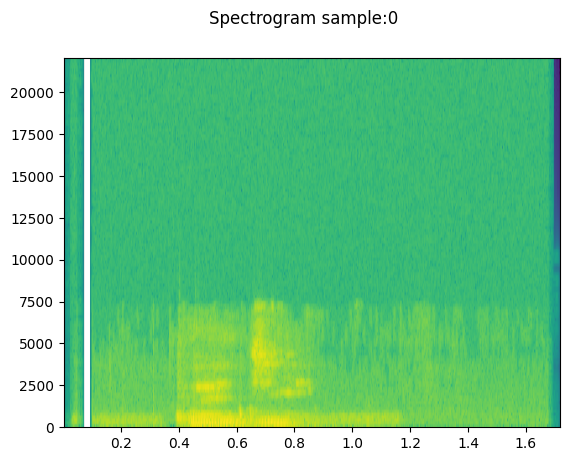

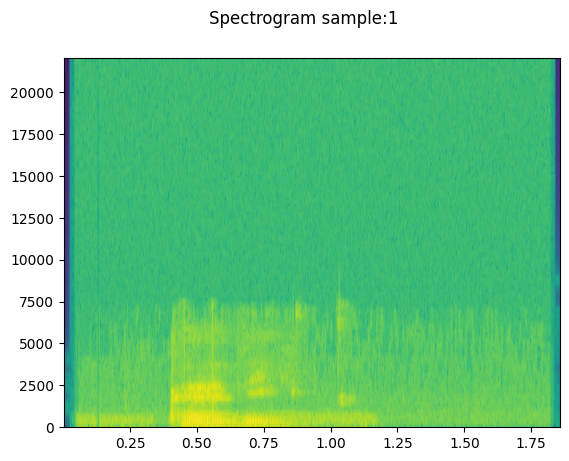

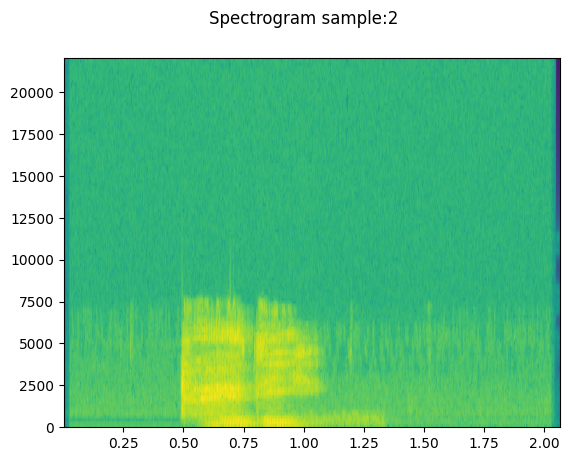

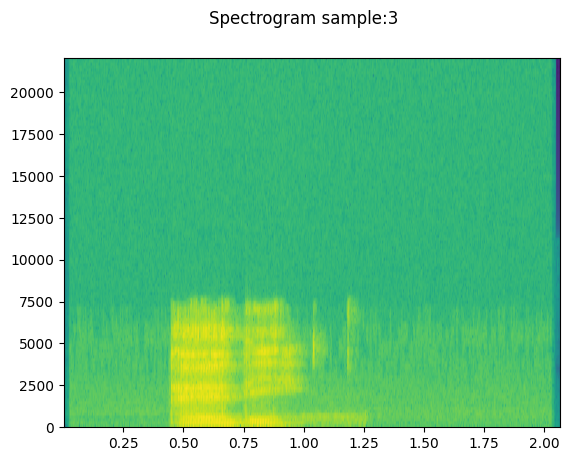

In [102]:
for idx, w in enumerate(waveform):
  plot_specgram(waveform[idx], sample_rate[idx], title=f"Spectrogram sample:{idx}")

# Audio Resampling

In [103]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

print(torch.__version__)
print(torchaudio.__version__)

2.8.0+cu126
2.8.0+cu126


In [104]:
pip install resampy

In [105]:
import math
import timeit

import librosa
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
import resampy
from IPython.display import Audio

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

DEFAULT_OFFSET = 201


def _get_log_freq(sample_rate, max_sweep_rate, offset):
    """Get freqs evenly spaced out in log-scale, between [0, max_sweep_rate // 2]

    offset is used to avoid negative infinity `log(offset + x)`.

    """
    start, stop = math.log(offset), math.log(offset + max_sweep_rate // 2)
    return torch.exp(torch.linspace(start, stop, sample_rate, dtype=torch.double)) - offset


def _get_inverse_log_freq(freq, sample_rate, offset):
    """Find the time where the given frequency is given by _get_log_freq"""
    half = sample_rate // 2
    return sample_rate * (math.log(1 + freq / offset) / math.log(1 + half / offset))


def _get_freq_ticks(sample_rate, offset, f_max):
    # Given the original sample rate used for generating the sweep,
    # find the x-axis value where the log-scale major frequency values fall in
    times, freq = [], []
    for exp in range(2, 5):
        for v in range(1, 10):
            f = v * 10**exp
            if f < sample_rate // 2:
                t = _get_inverse_log_freq(f, sample_rate, offset) / sample_rate
                times.append(t)
                freq.append(f)
    t_max = _get_inverse_log_freq(f_max, sample_rate, offset) / sample_rate
    times.append(t_max)
    freq.append(f_max)
    return times, freq


def get_sine_sweep(sample_rate, offset=DEFAULT_OFFSET):
    max_sweep_rate = sample_rate
    freq = _get_log_freq(sample_rate, max_sweep_rate, offset)
    delta = 2 * math.pi * freq / sample_rate
    cummulative = torch.cumsum(delta, dim=0)
    signal = torch.sin(cummulative).unsqueeze(dim=0)
    return signal


def plot_sweep(
    waveform,
    sample_rate,
    title,
    max_sweep_rate=48000,
    offset=DEFAULT_OFFSET,
):
    x_ticks = [100, 500, 1000, 5000, 10000, 20000, max_sweep_rate // 2]
    y_ticks = [1000, 5000, 10000, 20000, sample_rate // 2]

    time, freq = _get_freq_ticks(max_sweep_rate, offset, sample_rate // 2)
    freq_x = [f if f in x_ticks and f <= max_sweep_rate // 2 else None for f in freq]
    freq_y = [f for f in freq if f in y_ticks and 1000 <= f <= sample_rate // 2]

    figure, axis = plt.subplots(1, 1)
    _, _, _, cax = axis.specgram(waveform[0].numpy(), Fs=sample_rate)
    plt.xticks(time, freq_x)
    plt.yticks(freq_y, freq_y)
    axis.set_xlabel("Original Signal Frequency (Hz, log scale)")
    axis.set_ylabel("Waveform Frequency (Hz)")
    axis.xaxis.grid(True, alpha=0.67)
    axis.yaxis.grid(True, alpha=0.67)
    figure.suptitle(f"{title} (sample rate: {sample_rate} Hz)")
    plt.colorbar(cax)

# UP and DOWN pampling 44100 hz -> 48000 hz

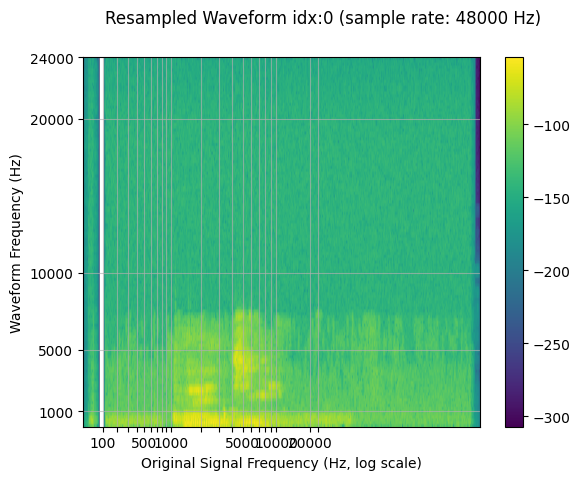

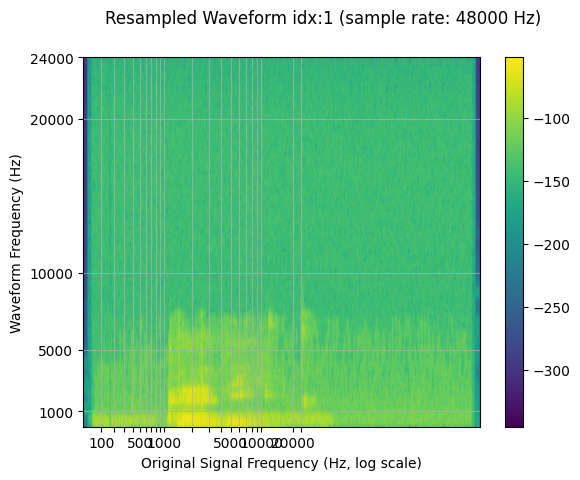

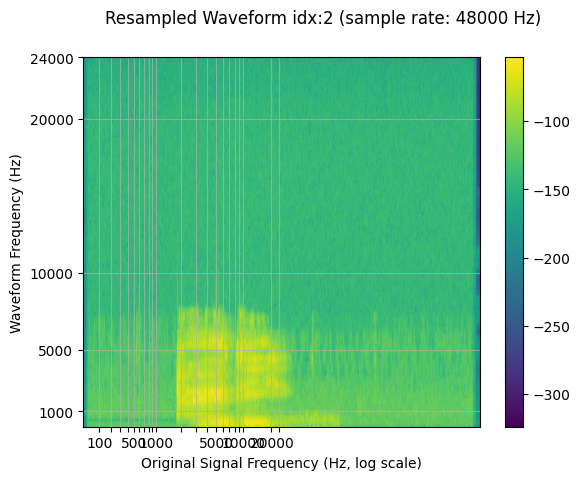

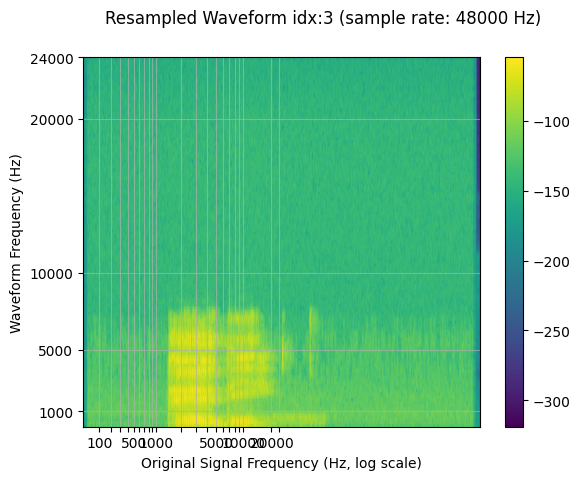

In [106]:
# T = 1/Hz
# upsampling 44100 -> 48000

resample_rate = 48000
resampled_waveform = []

for idx, w in enumerate(waveform):
    try:
        # 리샘플러 생성
        r = T.Resample(sample_rate[idx], resample_rate, dtype=w.dtype)

        # 리샘플링 수행
        new_waveform = r(w)
        resampled_waveform.append(new_waveform)

        # 플롯 그리기
        plot_sweep(new_waveform, resample_rate, title=f"Resampled Waveform idx:{idx}", max_sweep_rate=sample_rate[idx])
    except Exception as e:
        print('err..')

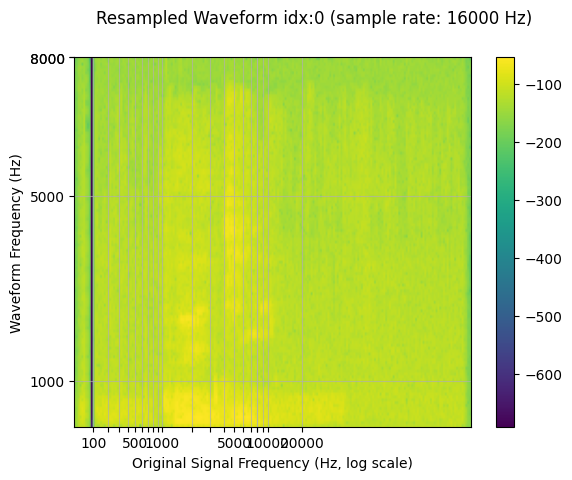

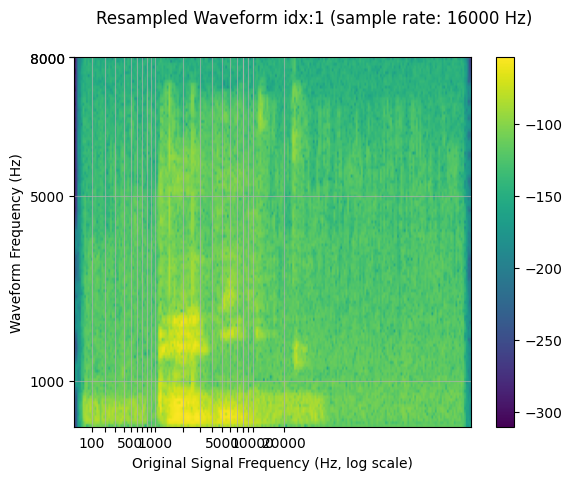

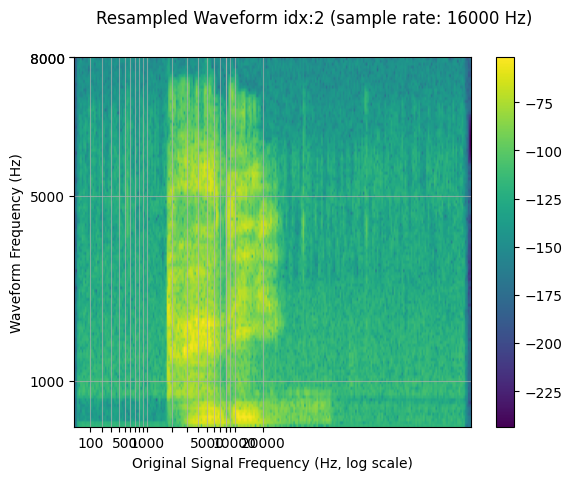

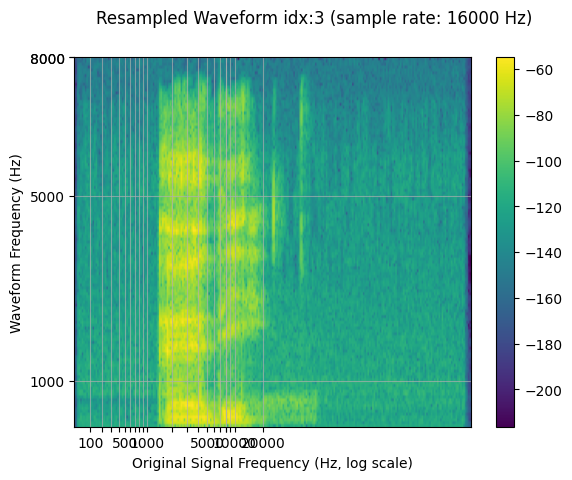

In [107]:
# T = 1/Hz
# down sampling 44100 -> 16000

resample_rate = 16000
resampled_waveform = []

for idx, w in enumerate(waveform):
    try:
        # 리샘플러 생성
        r = T.Resample(sample_rate[idx], resample_rate, dtype=w.dtype)

        # 리샘플링 수행
        new_waveform = r(w)
        resampled_waveform.append(new_waveform)

        # 플롯 그리기
        plot_sweep(new_waveform, resample_rate, title=f"Resampled Waveform idx:{idx}", max_sweep_rate=sample_rate[idx])
    except Exception as e:
        print('e')

#Lowpass_Filter

/usr/local/lib/python3.12/dist-packages/matplotlib/axes/_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


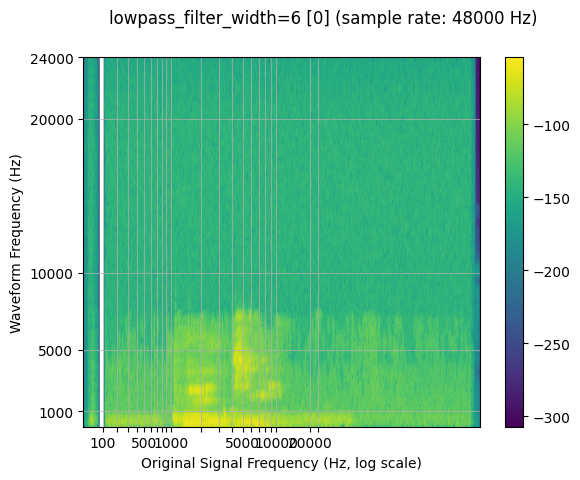

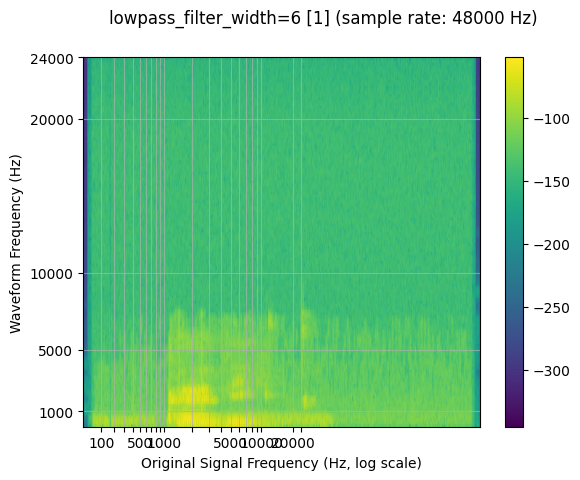

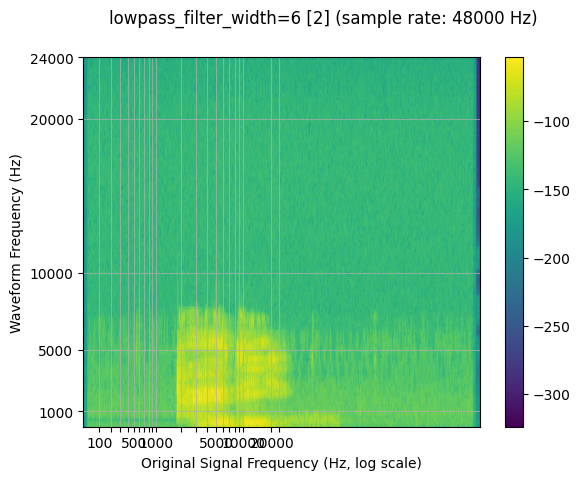

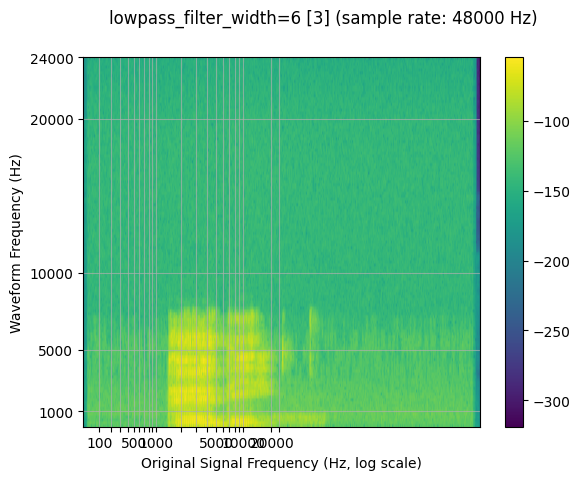

In [108]:
resample_rate = 48000
resampled_waveforms = []

for idx, w in enumerate(waveform):
  try:
    new_w = F.resample(w, sample_rate[idx], resample_rate, lowpass_filter_width=6)
    resampled_waveforms.append(new_w)

    plot_sweep(resampled_waveforms[idx], resample_rate, title=f'lowpass_filter_width=6 [{idx}]', max_sweep_rate=sample_rate[idx])
  except Exception as e:
    print(e)

/usr/local/lib/python3.12/dist-packages/matplotlib/axes/_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


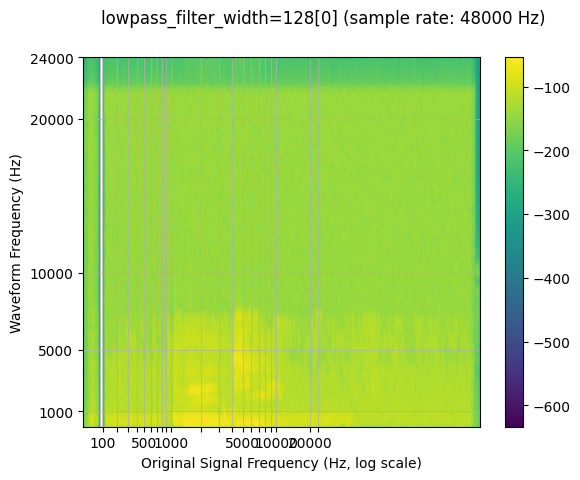

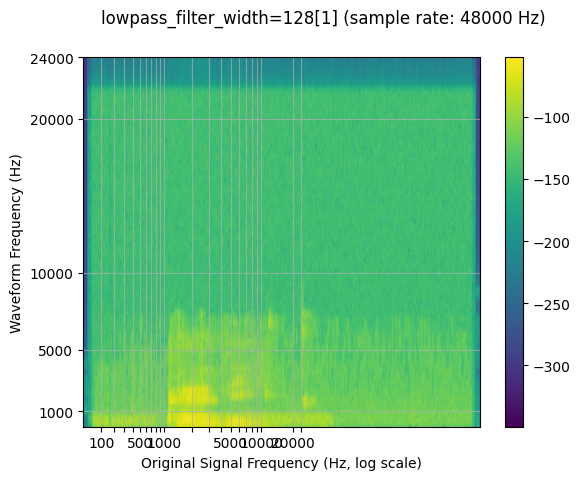

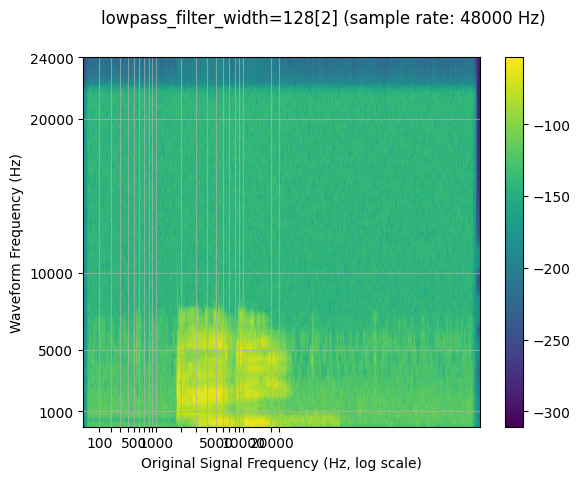

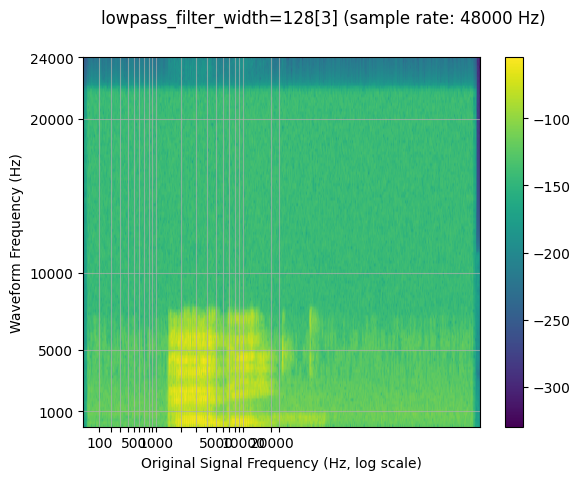

In [109]:
resampled_waveforms = []

for idx, w in enumerate(waveform):
  try:
    new_w = F.resample(w, sample_rate[idx], resample_rate, lowpass_filter_width=128)
    resampled_waveforms.append(new_w)

    plot_sweep(resampled_waveforms[idx], resample_rate, title=f'lowpass_filter_width=128[{idx}]', max_sweep_rate=sample_rate[idx])
  except Exception as e:
    print(e)

# Roll_Off

/usr/local/lib/python3.12/dist-packages/matplotlib/axes/_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


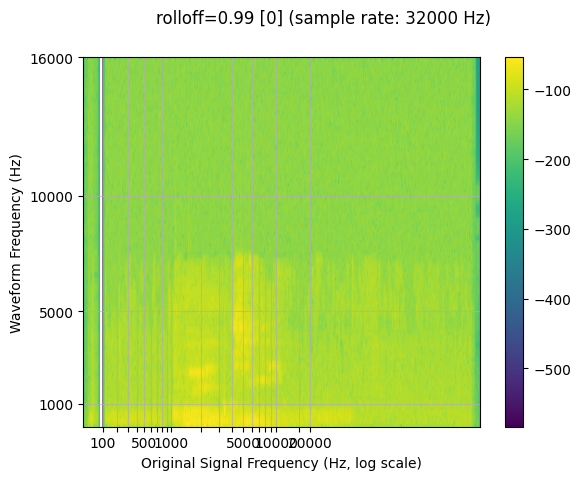

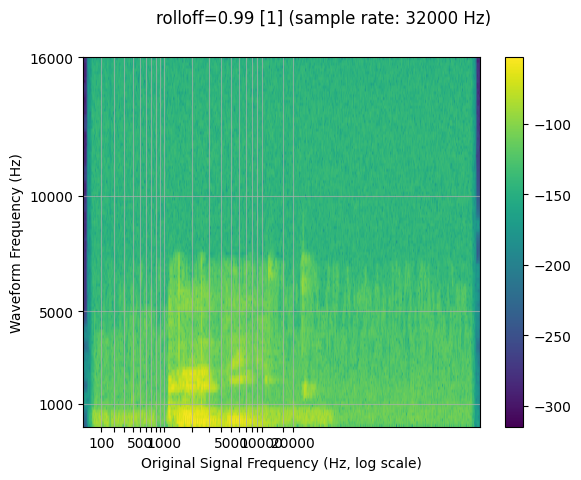

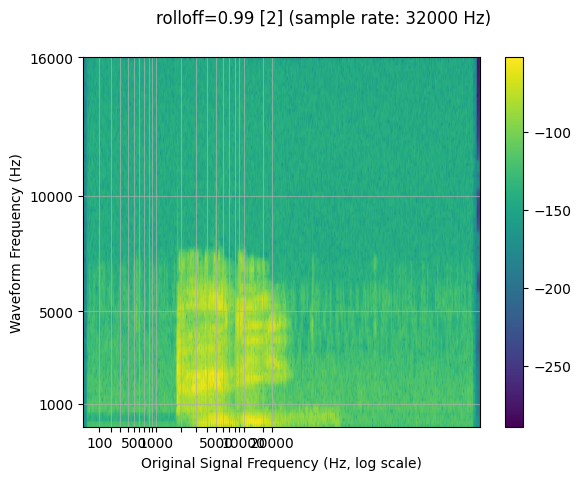

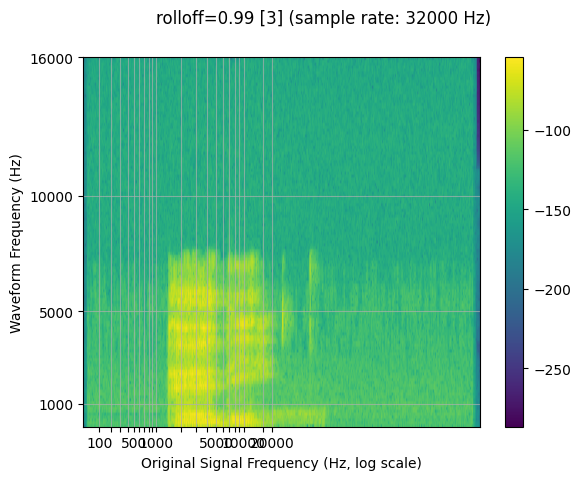

In [110]:
resample_rate = 32000
resampled_waveforms = []

for idx, w in enumerate(waveform):
  try:
    new_w = F.resample(w, sample_rate[idx], resample_rate, rolloff=0.99)
    resampled_waveforms.append(new_w)

    plot_sweep(resampled_waveforms[idx], resample_rate, title=f'rolloff=0.99 [{idx}]', max_sweep_rate=sample_rate[idx])
  except Exception as e:
    print(e)

/usr/local/lib/python3.12/dist-packages/matplotlib/axes/_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


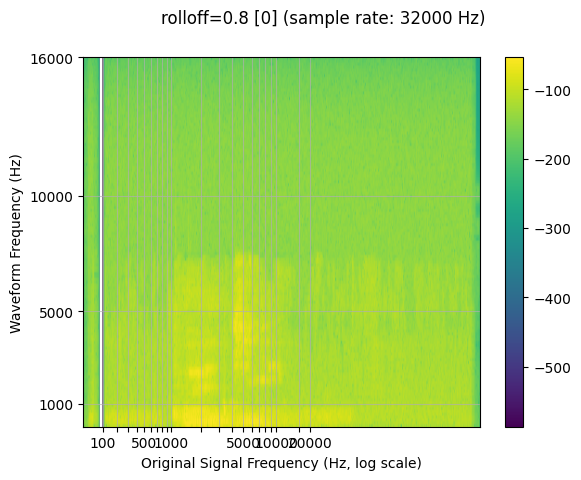

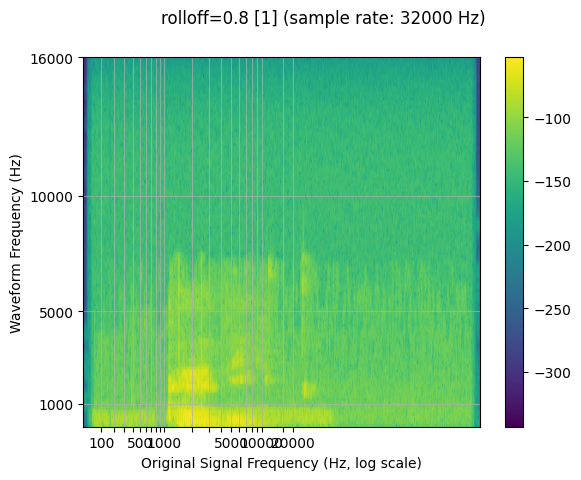

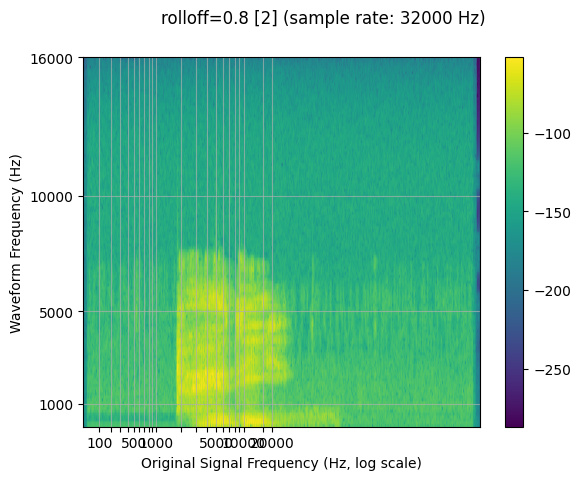

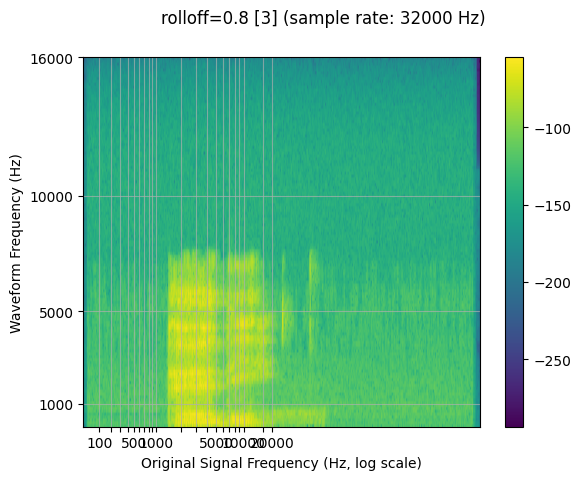

In [111]:
resampled_waveforms = []

for idx, w in enumerate(waveform):
  try:
    new_w = F.resample(w, sample_rate[idx], resample_rate, rolloff=0.8)
    resampled_waveforms.append(new_w)

    plot_sweep(resampled_waveforms[idx], resample_rate, title=f'rolloff=0.8 [{idx}]', max_sweep_rate=sample_rate[idx])
  except Exception as e:
    print(e)

# Kaiser_Best

/usr/local/lib/python3.12/dist-packages/matplotlib/axes/_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


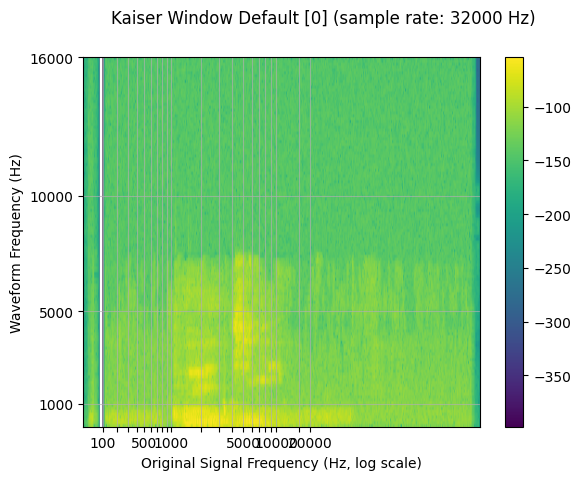

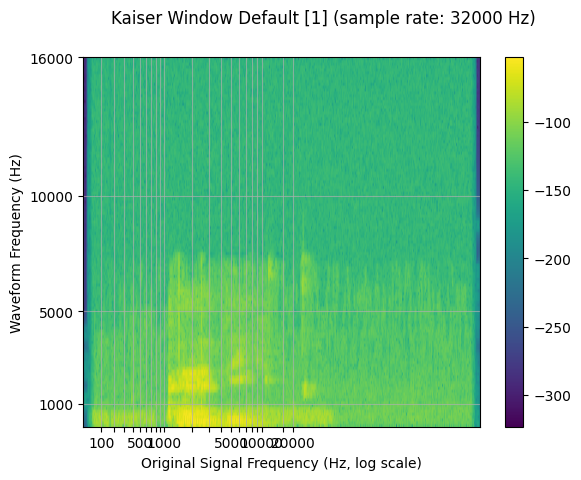

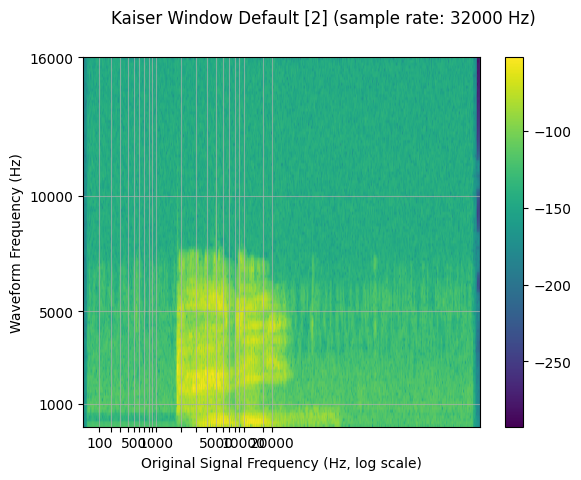

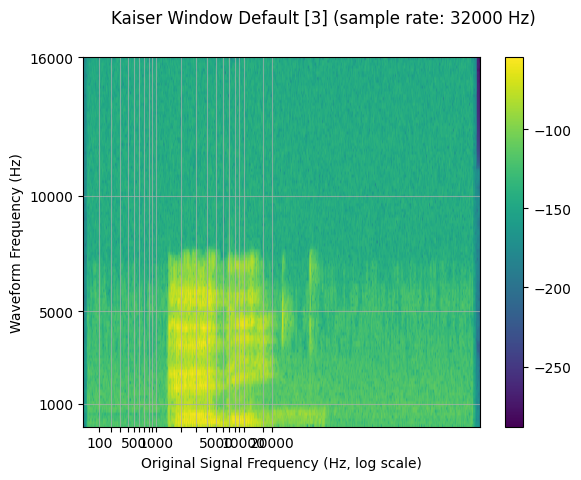

In [112]:
resampled_waveforms = []

for idx, w in enumerate(waveform):
  try:
    new_w = F.resample(w, sample_rate[idx], resample_rate, resampling_method="sinc_interp_kaiser")
    resampled_waveforms.append(new_w)

    plot_sweep(resampled_waveforms[idx], resample_rate, title=f'Kaiser Window Default [{idx}]', max_sweep_rate=sample_rate[idx])
  except Exception as e:
    print(e)

# Performance Benchmarking

In [113]:
print(f"torchaudio: {torchaudio.__version__}")
print(f"librosa: {librosa.__version__}")
print(f"resampy: {resampy.__version__}")

torchaudio: 2.8.0+cu126
librosa: 0.11.0
resampy: 0.4.3


In [114]:
def benchmark_resample_functional(
    waveform,
    sample_rate,
    resample_rate,
    lowpass_filter_width=6,
    rolloff=0.99,
    resampling_method="sinc_interp_hann",
    beta=None,
    iters=5,
):
    return (
        timeit.timeit(
            stmt="""
torchaudio.functional.resample(
    waveform,
    sample_rate,
    resample_rate,
    lowpass_filter_width=lowpass_filter_width,
    rolloff=rolloff,
    resampling_method=resampling_method,
    beta=beta,
)
        """,
            setup="import torchaudio",
            number=iters,
            globals=locals(),
        )
        * 1000
        / iters
    )


In [115]:
def benchmark_resample_transforms(
    waveform,
    sample_rate,
    resample_rate,
    lowpass_filter_width=6,
    rolloff=0.99,
    resampling_method="sinc_interp_hann",
    beta=None,
    iters=5,
):
    return (
        timeit.timeit(
            stmt="resampler(waveform)",
            setup="""
import torchaudio

resampler = torchaudio.transforms.Resample(
    sample_rate,
    resample_rate,
    lowpass_filter_width=lowpass_filter_width,
    rolloff=rolloff,
    resampling_method=resampling_method,
    dtype=waveform.dtype,
    beta=beta,
)
resampler.to(waveform.device)
        """,
            number=iters,
            globals=locals(),
        )
        * 1000
        / iters
    )

In [116]:
def benchmark_resample_librosa(
    waveform,
    sample_rate,
    resample_rate,
    res_type=None,
    iters=5,
):
    waveform_np = waveform.squeeze().numpy()
    return (
        timeit.timeit(
            stmt="""
librosa.resample(
    waveform_np,
    orig_sr=sample_rate,
    target_sr=resample_rate,
    res_type=res_type,
)
        """,
            setup="import librosa",
            number=iters,
            globals=locals(),
        )
        * 1000
        / iters
    )

In [117]:
def benchmark(sample_rate, resample_rate):
    times, rows = [], []
    waveform = get_sine_sweep(sample_rate).to(torch.float32)

    args = (waveform, sample_rate, resample_rate)

    # sinc 64 zero-crossings
    f_time = benchmark_resample_functional(*args, lowpass_filter_width=64)
    t_time = benchmark_resample_transforms(*args, lowpass_filter_width=64)
    times.append([None, f_time, t_time])
    rows.append("sinc (width 64)")

    # sinc 6 zero-crossings
    f_time = benchmark_resample_functional(*args, lowpass_filter_width=16)
    t_time = benchmark_resample_transforms(*args, lowpass_filter_width=16)
    times.append([None, f_time, t_time])
    rows.append("sinc (width 16)")

    # kaiser best
    kwargs = {
        "lowpass_filter_width": 64,
        "rolloff": 0.9475937167399596,
        "resampling_method": "sinc_interp_kaiser",
        "beta": 14.769656459379492,
    }
    lib_time = benchmark_resample_librosa(*args, res_type="kaiser_best")
    f_time = benchmark_resample_functional(*args, **kwargs)
    t_time = benchmark_resample_transforms(*args, **kwargs)
    times.append([lib_time, f_time, t_time])
    rows.append("kaiser_best")

    # kaiser fast
    kwargs = {
        "lowpass_filter_width": 16,
        "rolloff": 0.85,
        "resampling_method": "sinc_interp_kaiser",
        "beta": 8.555504641634386,
    }
    lib_time = benchmark_resample_librosa(*args, res_type="kaiser_fast")
    f_time = benchmark_resample_functional(*args, **kwargs)
    t_time = benchmark_resample_transforms(*args, **kwargs)
    times.append([lib_time, f_time, t_time])
    rows.append("kaiser_fast")

    df = pd.DataFrame(times, columns=["librosa", "functional", "transforms"], index=rows)
    return df

In [118]:
def plot(df):
    print(df.round(2))
    ax = df.plot(kind="bar")
    plt.ylabel("Time Elapsed [ms]")
    plt.xticks(rotation=0, fontsize=10)
    for cont, col, color in zip(ax.containers, df.columns, mcolors.TABLEAU_COLORS):
        label = ["N/A" if v != v else str(v) for v in df[col].round(2)]
        ax.bar_label(cont, labels=label, color=color, fontweight="bold", fontsize="x-small")

                 librosa  functional  transforms
sinc (width 64)      NaN        1.77        1.21
sinc (width 16)      NaN        1.12        0.53
kaiser_best      2176.01        6.17        0.85
kaiser_fast         7.83        4.15        0.84


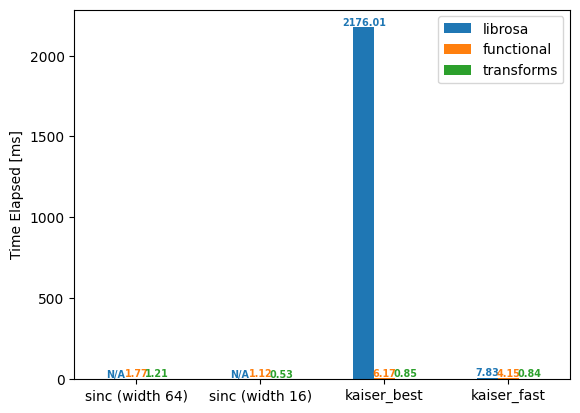

In [119]:
df = benchmark(48_000, 44_100)
plot(df)

                 librosa  functional  transforms
sinc (width 64)      NaN        1.60        0.59
sinc (width 16)      NaN        1.02        0.48
kaiser_best       154.48        4.86        0.79
kaiser_fast         8.59        3.54        0.51


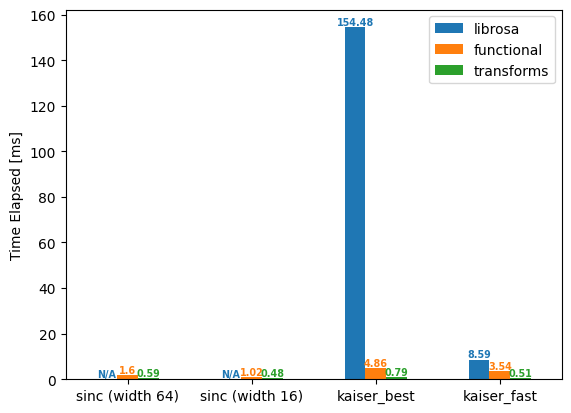

In [120]:
df = benchmark(44_100, 48_000)
plot(df)

                 librosa  functional  transforms
sinc (width 64)      NaN        7.85        0.60
sinc (width 16)      NaN        0.40        0.24
kaiser_best        52.65        0.87        0.53
kaiser_fast         2.70        0.55        0.21


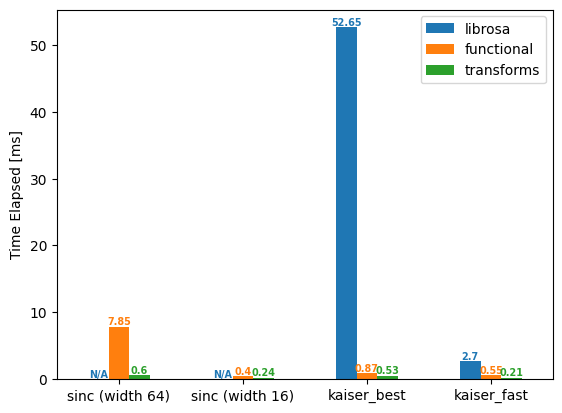

In [121]:
df = benchmark(8_000, 16_000)
plot(df)